In [2]:
# Importar las librerías necesarias
# Manejo de datos
import numpy as np

# Guardar y cargar modelos
import joblib

# Usar la SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Mostrar la matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## MFCC

In [3]:
# Cargar los datos de entrenamiento
y_train_mfcc = np.load('data_preprocessed/y_train_mfcc.npy')

# Cargar los datos de prueba
y_test_mfcc = np.load('data_preprocessed/y_test_mfcc.npy')

# Cargar los datos no escalados
X_train_mfcc = np.load('data_preprocessed/X_train_mfcc.npy')
X_test_mfcc = np.load('data_preprocessed/X_test_mfcc.npy')

# Cargar los datos ya escalados
# X_train_mfcc = np.load('data_preprocessed/scalers_PCA/X_train_mfcc_scaled.npy')
# X_test_mfcc = np.load('data_preprocessed/scalers_PCA/X_test_mfcc_scaled.npy')

In [4]:
# Crear y entrenar el modelo SVM
clf_svm_mfcc = SVC(kernel='rbf', probability=True, random_state=42)
clf_svm_mfcc.fit(X_train_mfcc, y_train_mfcc)

# Predecir en el conjunto de prueba
y_pred_svm_mfcc = clf_svm_mfcc.predict(X_test_mfcc)

# Evaluar el modelo
print("SVM con MFCC - Precisión en prueba:", accuracy_score(y_test_mfcc, y_pred_svm_mfcc))
print("Reporte de clasificación (SVM con MFCC):")
print(classification_report(y_test_mfcc, y_pred_svm_mfcc))
# Guardar el modelo SVM con MFCC
joblib.dump(clf_svm_mfcc, 'models/SVM/svm_mfcc_model.pkl')

SVM con MFCC - Precisión en prueba: 0.8713854121709107
Reporte de clasificación (SVM con MFCC):
              precision    recall  f1-score   support

           0       0.96      0.77      0.85      2264
           1       0.81      0.97      0.89      2370

    accuracy                           0.87      4634
   macro avg       0.89      0.87      0.87      4634
weighted avg       0.89      0.87      0.87      4634



['models/SVM/svm_mfcc_model.pkl']

La precisión con escalado es 0.51035

La precisión sin escalado es 0.87138

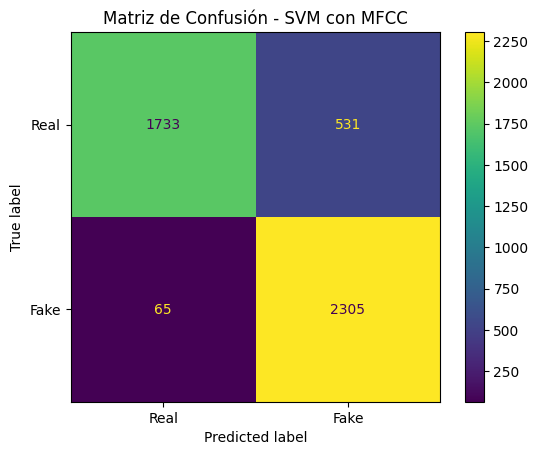

In [11]:
# Matriz de Confusión - SVM con MFCC
cm_svm_mfcc = confusion_matrix(y_test_mfcc, y_pred_svm_mfcc)
disp_svm_mfcc = ConfusionMatrixDisplay(confusion_matrix=cm_svm_mfcc, display_labels=['Real', 'Fake'])
disp_svm_mfcc.plot()
plt.title('Matriz de Confusión - SVM con MFCC')
plt.show()

## Spectrogram

No se ha implementado ya que pesa considerablemente más que el MFCC y en pruebas previas no se ha determinado una mejora significativa en la precisión.

El código presentado a continuación funciona con el espectrograma, pero no se ha ejecutado por carga computacional.

In [ ]:
# Cargar los datos de entrenamiento
y_train_spectrogram = np.load('data_preprocessed/y_train_spectrogram.npy')

# Cargar los datos de prueba
y_test_spectrogram = np.load('data_preprocessed/y_test_spectrogram.npy')

# Cargar los datos con PCA ya aplicado 
X_train_spectrogram_pca = np.load('data_preprocessed/scalers_PCA/X_train_spectrogram_pca.npy')
X_test_spectrogram_pca = np.load('data_preprocessed/scalers_PCA/X_test_spectrogram_pca.npy')

In [ ]:
# Crear y entrenar el modelo SVM
clf_svm_spectrogram = SVC(kernel='rbf', probability=True, random_state=42)
clf_svm_spectrogram.fit(X_train_spectrogram_pca, y_train_spectrogram)

# Predecir en el conjunto de prueba
y_pred_svm_spectrogram = clf_svm_spectrogram.predict(X_test_spectrogram_pca)

# Evaluar el modelo
print("SVM con Espectrograma - Precisión en prueba:", accuracy_score(y_test_spectrogram, y_pred_svm_spectrogram))
print("Reporte de clasificación (SVM con Espectrograma):")
print(classification_report(y_test_spectrogram, y_pred_svm_spectrogram))

# Guardar el modelo SVM con espectrogramas
joblib.dump(clf_svm_spectrogram, 'models/SVM/svm_spectrogram_model.pkl')

In [ ]:
# Matriz de Confusión - SVM con Espectrograma
cm_svm_spectrogram = confusion_matrix(y_test_spectrogram, y_pred_svm_spectrogram)
disp_svm_spectrogram = ConfusionMatrixDisplay(confusion_matrix=cm_svm_spectrogram, display_labels=['Real', 'Fake'])
disp_svm_spectrogram.plot()
plt.title('Matriz de Confusión - SVM con Espectrograma')
plt.show()